In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)


hv = pd.read_csv('heart.csv')
hv.describe()
hv.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [2]:
# displaying the shape of the dataset
hv.shape

(303, 14)

In [3]:
# getting statistical measures for the data
hv.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
hv.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [5]:
# displaying the first five rows of the heart dataset
hv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# displaying the last five rows of the heart dataset
hv.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset = hv, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
                    colorbar_title='sex',
    x_logscale = False, scale_bubble = 3, height = 650)
iplot(figure, config={'scrollzoom': True})

In [7]:
# getting the information about the dataset
hv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
# displaying for null values
hv.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# getting statistical data on distribution of the target variable
# 1 = defective heart
# 0 = healthy heart
hv['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
X = hv.drop(columns='target', axis=1)
Y =hv['target']
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
# SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [13]:
# MODEL TRAINING USING LOGISTIC REGRGRESSION MODEL FOR BINARY CLASSIFICATION

In [14]:
model = LogisticRegression()
model.fit(X_train, Y_train) #finding the relation

C:\Users\pradeep\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [15]:
# MODEL EVALUATION FOR ACCURACY
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("ACCURACY IN THE TRAINING MODEL =  ",training_data_accuracy)

ACCURACY IN THE TRAINING MODEL =   0.8553719008264463


In [16]:
# MODEL EVALUATION FOR ACCURACY
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("ACCURACY IN THE TEST MODEL =  ",test_data_accuracy)

ACCURACY IN THE TEST MODEL =   0.8524590163934426


In [17]:
# BUILDING A PREDICTIVE SYSTEM
input_data = (43,1,0,120,177,0,0,120,1,2.5,1,0,3)

# CHANGING THE DATA INTO NUMPY ARRAY FOR SHAPING AND FILERING THE DATA
input_data_as_numpy_array = np.asarray(input_data)

# RESHAPING A NUMPY ARRAY FOR ONLY ONE DATA
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("THE PERSON DOES NOT HAVE ANY HEART DISEASE \n")
else:
    print("THE PERSON HAS A HEART DISEASE \n")

[0]
THE PERSON DOES NOT HAVE ANY HEART DISEASE 



In [18]:
#MODEL TRAINING USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, Y_train) #finding the relation

RandomForestClassifier()

In [19]:
#MODEL EVALUATION FOR ACCURACY
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("ACCURACY IN THE TRAINING MODEL =  ",training_data_accuracy)

ACCURACY IN THE TRAINING MODEL =   1.0


In [20]:
# MODEL EVALUATION FOR ACCURACY
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("ACCURACY IN THE TEST MODEL =  ",test_data_accuracy)


ACCURACY IN THE TEST MODEL =   0.8360655737704918


In [21]:
# BUILDING A PREDICTIVE SYSTEM
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)


# CHANGING THE DATA INTO NUMPY ARRAY FOR SHAPING AND FILERING THE DATA
input_data_as_numpy_array = np.asarray(input_data)

# RESHAPING A NUMPY ARRAY FOR ONLY ONE DATA
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("THE PERSON DOES NOT HAVE ANY HEART DISEASE \n")
else:
    print("THE PERSON HAS A HEART DISEASE \n")

[1]
THE PERSON HAS A HEART DISEASE 



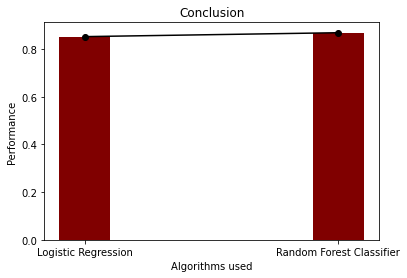

In [22]:
#CONCLUSION
import  matplotlib.pyplot as plt

#creating the dataset
data_bargraph= {'Logistic Regression':0.8524590163934426, 'Random Forest Classifier':0.8688524590163934}
algorithms= list(data_bargraph.keys())
scores= list(data_bargraph.values())
        
#creating the bar plot
fig,ax=plt.subplots()
ax.bar(algorithms, scores, color='maroon', width=0.2)
ax.plot(algorithms,scores, color='black', marker='o')


ax.set_title('Conclusion')
ax.set_xlabel("Algorithms used")
ax.set_ylabel("Performance")
plt.show()
